In [13]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning up the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [14]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_ind = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

df_ind = df_ind.dropna(subset='salary_year_avg')
df_exp = df_ind.explode('job_skills')
df_exp

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,java,"{'analyst_tools': ['power bi', 'dax'], 'async'..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,t-sql,"{'analyst_tools': ['power bi', 'dax'], 'async'..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,sql,"{'analyst_tools': ['power bi', 'dax'], 'async'..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,azure,"{'analyst_tools': ['power bi', 'dax'], 'async'..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,power bi,"{'analyst_tools': ['power bi', 'dax'], 'async'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,spark,"{'analyst_tools': ['power bi', 'tableau', 'qli..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,power bi,"{'analyst_tools': ['power bi', 'tableau', 'qli..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,tableau,"{'analyst_tools': ['power bi', 'tableau', 'qli..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,qlik,"{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [15]:
df_skills = df_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

df_skills = df_skills.rename(columns={'count' : 'skill_count', 'median' : 'median_salary'})

df_jobs_total = len(df_ind)

df_skills['skill_percent'] = 100 * df_skills['skill_count'] / df_jobs_total

df_skills = df_skills.head(13)

df_skills



,skill_count,median_salary,skill_percent
job_skills,,,
sql,209,118140.0,58.873239
python,199,120000.0,56.056338
spark,118,147500.0,33.239437
aws,92,96773.0,25.915493
azure,82,120000.0,23.098592
hadoop,76,147500.0,21.408451
java,67,147500.0,18.873239
excel,66,100500.0,18.591549
tableau,66,111175.0,18.591549


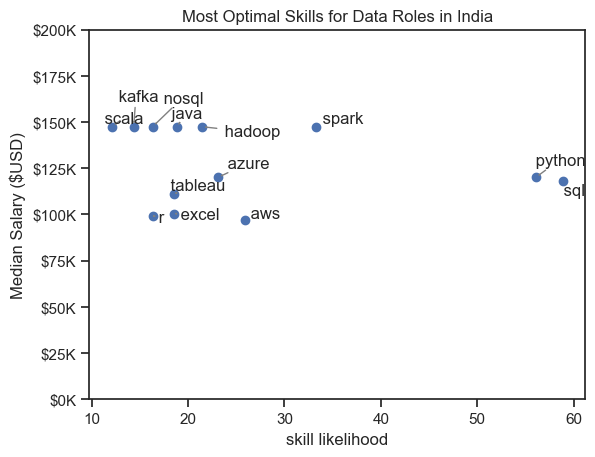

In [16]:
from adjustText import adjust_text

plt.scatter(df_skills['skill_percent'], df_skills['median_salary'])
plt.xlabel('skill likelihood')
plt.ylabel('Median Salary ($USD)')  
plt.title('Most Optimal Skills for Data Roles in India')
plt.ylim(0,200000)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

texts = []
for i, txt in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['skill_percent'].iloc[i], df_skills['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [17]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict: 
            technology_dict[key] += value
        else: 
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['power bi',
  'dax',
  'spreadsheet',
  'outlook',
  'datarobot',
  'word',
  'ssis',
  'ms access',
  'tableau',
  'looker',
  'ssrs',
  'sap',
  'sheets',
  'msaccess',
  'powerpoint',
  'sharepoint',
  'excel',
  'nuix',
  'sas',
  'spss',
  'cognos',
  'alteryx',
  'splunk',
  'esquisse',
  'visio',
  'microstrategy',
  'powerbi',
  'qlik'],
 'programming': ['vba',
  'pascal',
  'powershell',
  'shell',
  'mongo',
  'lua',
  'perl',
  'c',
  'elixir',
  'visualbasic',
  'php',
  'sass',
  'visual basic',
  'java',
  'objective-c',
  'clojure',
  'c#',
  'lisp',
  'julia',
  'bash',
  'crystal',
  'cobol',
  'typescript',
  'fortran',
  'matlab',
  'groovy',
  'scala',
  'dart',
  'ocaml',
  'sas',
  'vb.net',
  'golang',
  'css',
  'assembly',
  'kotlin',
  'swift',
  'ruby',
  'c++',
  'mongodb',
  'javascript',
  'apl',
  'solidity',
  'delphi',
  'python',
  'r',
  'go',
  'nosql',
  'f#',
  'rust',
  'erlang',
  'haskell',
  'sql',
  't-sql',
  'no-sql',
  'h

In [18]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,dax
0,analyst_tools,spreadsheet
0,analyst_tools,outlook
0,analyst_tools,datarobot
...,...,...
9,sync,zoom
9,sync,symphony
9,sync,webex
9,sync,mattermost


In [19]:
df_skills = df_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_skills

,skill_count,median_salary,skill_percent,technology,skills
0,209,118140.0,58.873239,programming,sql
1,199,120000.0,56.056338,programming,python
2,118,147500.0,33.239437,libraries,spark
3,92,96773.0,25.915493,cloud,aws
4,82,120000.0,23.098592,cloud,azure
5,76,147500.0,21.408451,libraries,hadoop
6,67,147500.0,18.873239,programming,java
7,66,100500.0,18.591549,analyst_tools,excel
8,66,111175.0,18.591549,analyst_tools,tableau
9,58,147500.0,16.338028,programming,nosql


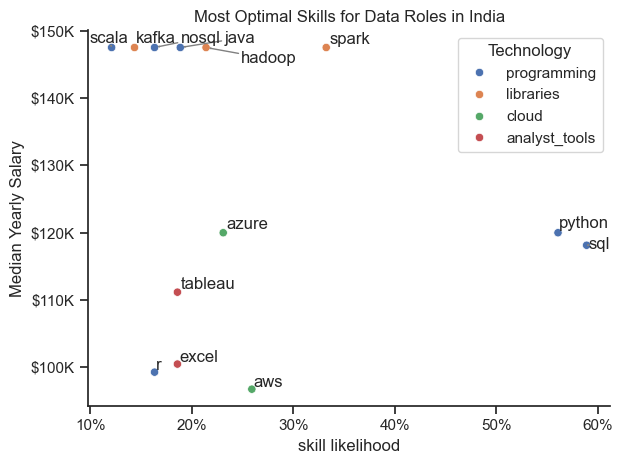

In [20]:
sns.scatterplot(
    data=df_skills,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')
texts = []
for i, txt in enumerate(df_skills['skills']):
    texts.append(plt.text(df_skills['skill_percent'].iloc[i], df_skills['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('skill likelihood')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Roles in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()